In [52]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [55]:
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)


print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

C:\Users\Karthick\anaconda3\lib\site-packages\tensorflow\python\client\session.py:1769: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [27]:
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
IMAGE_SIZE = [224, 224]

train_path = r"C:\Users\Public\Downloads\train_images"
valid_path = r"C:\Users\Public\Downloads\Test_images"

In [28]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [29]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = r"C:\Users\Public\Downloads\train_images"
valid_path = r"C:\Users\Public\Downloads\Test_images"

In [30]:
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [31]:
for layer in resnet152V2.layers:
    layer.trainable = False

In [39]:
folders = glob(r"C:\Users\Public\Downloads\train_images\*")

In [40]:
# our layers - you can add more if you want
x = Flatten()(resnet152V2.output)

In [43]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [44]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [46]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [47]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [48]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(r"C:\Users\Public\Downloads\train_images",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2771 images belonging to 5 classes.


In [49]:
test_set = test_datagen.flow_from_directory(r"C:\Users\Public\Downloads\Test_images",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 885 images belonging to 5 classes.


In [56]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
87/87 [==============================] - 997s 11s/step - loss: 3.5771 - accuracy: 0.7521 - val_loss: 2.5433 - val_accuracy: 0.8068
Epoch 2/10
87/87 [==============================] - 729s 8s/step - loss: 3.1875 - accuracy: 0.7770 - val_loss: 3.8138 - val_accuracy: 0.7684
Epoch 3/10
87/87 [==============================] - 717s 8s/step - loss: 3.0813 - accuracy: 0.7795 - val_loss: 3.0093 - val_accuracy: 0.7751
Epoch 4/10
87/87 [==============================] - 760s 9s/step - loss: 2.6530 - accuracy: 0.7990 - val_loss: 3.6985 - val_accuracy: 0.7616
Epoch 5/10
87/87 [==============================] - 755s 9s/step - loss: 2.8778 - accuracy: 0.7997 - val_loss: 3.7960 - val_accuracy: 0.7605
Epoch 6/10
87/87 [==============================] - 796s 9s/step - loss: 2.8817 - accuracy: 0.8037 - val_loss: 3.1420 - val_accuracy: 0.7887
Epoch 7/10
87/87 [==============================] - 753s 9s/step - loss: 2.3676 - accuracy: 0.8232 - val_loss: 3.7637 - val_accuracy: 0.8011
Epoch 8/10
8

In [57]:
import matplotlib.pyplot as plt

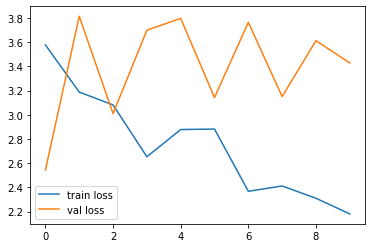

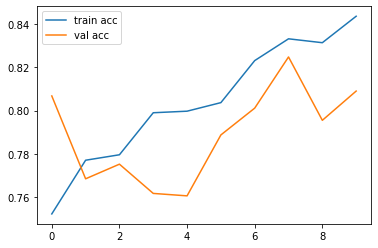

<Figure size 432x288 with 0 Axes>

In [58]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [67]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet152V2.h5')

In [237]:
y_pred = model.predict(test_set)

28/28 [==============================] - 243s 9s/step


In [238]:
y_pred

array([[5.0240965e-24, 4.2064243e-19, 1.0000000e+00, 8.5875185e-24,
        1.9295029e-27],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [2.2866210e-24, 3.1231362e-19, 1.0000000e+00, 4.6614788e-31,
        2.1668609e-33],
       ...,
       [1.8384209e-06, 4.3905456e-02, 9.5609266e-01, 1.4377138e-16,
        4.9233489e-11],
       [2.1017843e-22, 1.6549885e-18, 1.0000000e+00, 2.0126581e-28,
        1.1381329e-33],
       [1.2523859e-26, 4.8775109e-04, 0.0000000e+00, 9.9951220e-01,
        4.0882027e-09]], dtype=float32)

In [239]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [240]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 4, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 3, 1, 2, 2, 2, 2, 1, 3, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 0, 2,
       2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 4, 2, 2, 2, 1, 3, 1, 2, 1,
       2, 1, 2, 2, 2, 1, 2, 2, 4, 2, 2, 2, 1, 1, 0, 2, 2, 2, 0, 2, 2, 1,
       2, 1, 2, 0, 4, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 3, 2,
       2, 1, 2, 1, 2, 2, 2, 3, 1, 3, 2, 4, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 1, 4, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1,
       1, 4, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 3, 4, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 3, 2, 0, 2, 1, 3, 2, 2, 2, 3,
       2, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 0, 1, 4, 1, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1,
       1, 0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2,

In [206]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [207]:
model=load_model('model_resnet152V2.h5')

In [297]:
def model_predict(img_path, model):
    print(img_path)
    img = image.load_img(img_path, target_size=(224, 224))

    # Preprocessing the image
    x = image.img_to_array(img)
    # x = np.true_divide(x, 255)
    ## Scaling
    x=x/255
    x = np.expand_dims(x, axis=0)
   

    # Be careful how your trained model deals with the input
    # otherwise, it won't make correct prediction!
   # x = preprocess_input(x)

    preds = model.predict(x)
    preds=np.argmax(preds, axis=1)
    if preds==0:
        preds="mild"
    elif preds==1:
        preds="moderate"
    elif preds==2:
        preds="no dr"
    elif preds==3:
        preds="proliferative"
    elif preds==4:
        preds="severe"
        
    
    
    return preds

In [343]:
model_predict(r"C:\Users\Public\Downloads\train_images\Mild\6b00cb764237.png",model)

C:\Users\Public\Downloads\train_images\Mild\6b00cb764237.png
1/1 [==============================] - 0s 396ms/step


'mild'